# <font color=red>1.Importing required library</font>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# <font color=red>2.Exploring Data</font>

In [2]:
#loading of Data set 
df = pd.read_csv('mediamix_sales.csv')

In [3]:
#checking for shape of Data
df.shape

(200, 14)

In [4]:
#checking for 5 values in data set
df.head()

,Time,tv_sponsorships,tv_cricket,tv_RON,radio,NPP,Magazines,OOH,Social,Programmatic,Display_Rest,Search,Native,sales
0,1/1/01,119.652,66.729,43.719,37.8,55.36,13.84,35,41.8782,5,33.50256,26.802048,5,22100
1,1/2/01,23.140,12.905,8.455,39.3,36.08,9.02,35,8.0990,5,6.47920,5.183360,6,10400
2,1/3/01,8.944,4.988,3.268,45.9,55.44,13.86,35,3.1304,5,2.50432,2.003456,7,9300
3,1/4/01,78.780,43.935,28.785,41.3,46.80,11.70,35,27.5730,5,22.05840,17.646720,5,18500
4,1/5/01,94.016,52.432,34.352,10.8,46.72,11.68,35,32.9056,5,26.32448,21.059584,7,12900


In [5]:
# Checking for  null values....if any?
df.isna().sum()

Time               0
tv_sponsorships    0
tv_cricket         0
tv_RON             0
radio              0
NPP                0
Magazines          0
OOH                0
Social             0
Programmatic       0
Display_Rest       0
Search             0
Native             0
sales              0
dtype: int64

In [6]:
#Checking for data types of each columns
df.dtypes

Time                object
tv_sponsorships    float64
tv_cricket         float64
tv_RON             float64
radio              float64
NPP                float64
Magazines          float64
OOH                  int64
Social             float64
Programmatic         int64
Display_Rest       float64
Search             float64
Native               int64
sales                int64
dtype: object

In [7]:
#Coverting Time column from object to datetime & renaming it as Date
df['Time'] = pd.to_datetime(df['Time'])
df.rename(columns={'Time': 'Date'},inplace=True)

In [8]:
#Statistical summary of Data
df.describe()

,tv_sponsorships,tv_cricket,tv_RON,radio,NPP,Magazines,OOH,Social,Programmatic,Display_Rest,Search,Native,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.512390,41.657365,51.143055,23.264000,24.372700,4.543300,29.350000,21.925009,17.650000,18.090883,15.664170,5.060000,14022.500000
std,50.672105,49.165205,52.431041,14.846809,18.054915,4.187503,10.103858,17.342664,4.508785,14.692380,11.355416,0.408945,5217.456566
min,0.700000,1.000000,0.000000,0.000000,0.270000,0.030000,15.000000,0.245000,5.000000,0.196000,0.156800,5.000000,1600.000000
25%,14.017500,1.750000,14.935000,9.975000,10.000000,1.015000,18.750000,9.259250,20.000000,3.986500,5.925920,5.000000,10375.000000
50%,44.705000,19.022000,31.330000,22.900000,18.800000,3.420000,30.000000,17.329375,20.000000,15.584800,14.106848,5.000000,12900.000000
75%,92.777500,68.286500,67.262500,36.525000,36.080000,6.185000,40.000000,33.302500,20.000000,29.134560,23.966880,5.000000,17400.000000
max,224.560000,207.480000,253.260000,49.600000,91.200000,22.800000,40.000000,78.596000,20.000000,62.876800,50.301440,9.000000,27000.000000


- There is No null value that means data is Cleaned
- we have converted dtypes as per requirements
- as we can see in summary the diff between mean & median is very high so they are having outliers

# <font color=red>3.Data Cleaning & Removing Outliers If Any</font>

- **Detecting Outliers & Treating them**

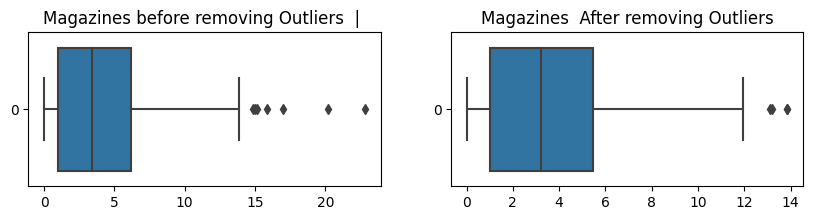

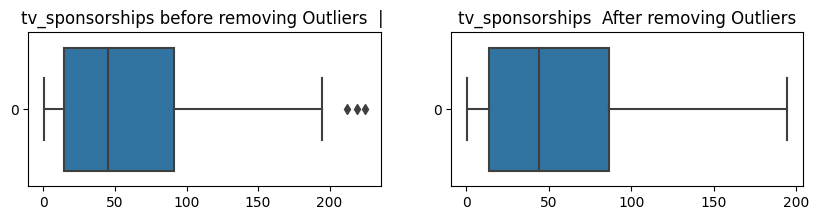

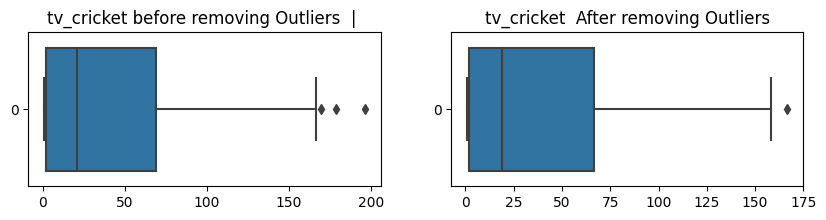

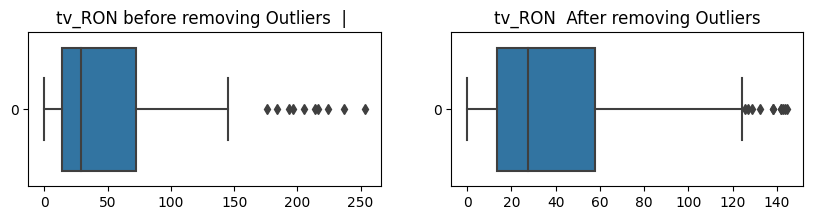

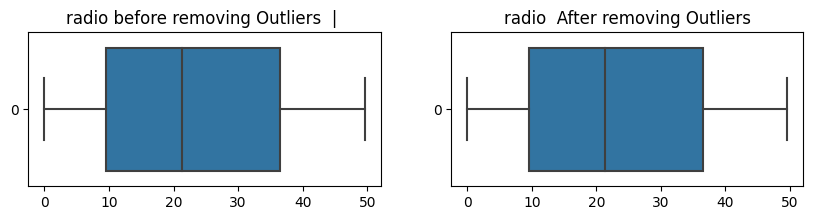

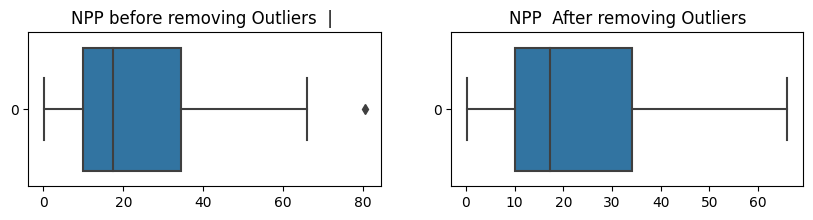

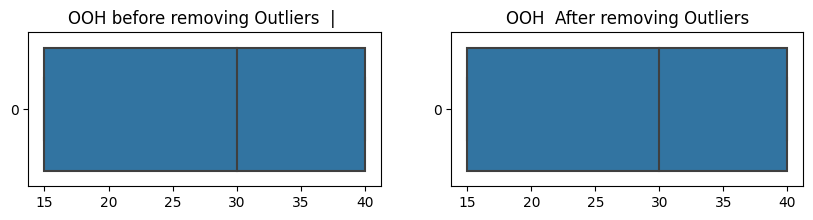

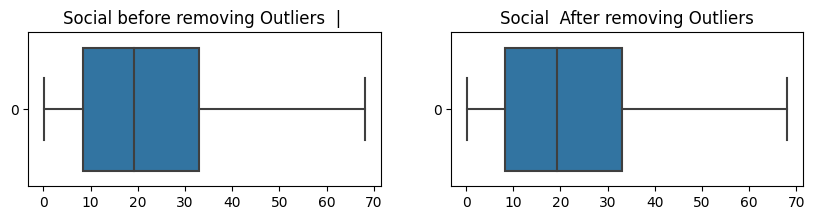

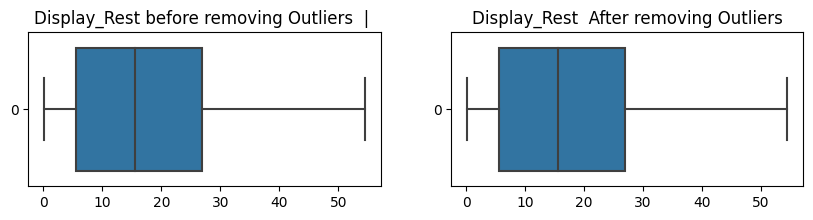

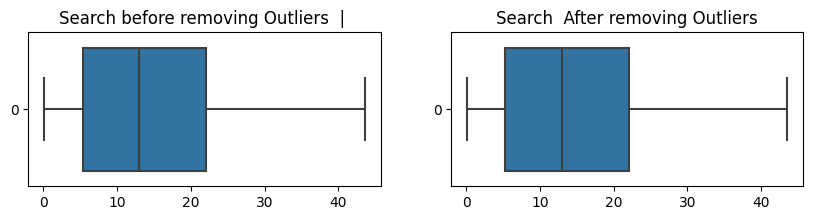

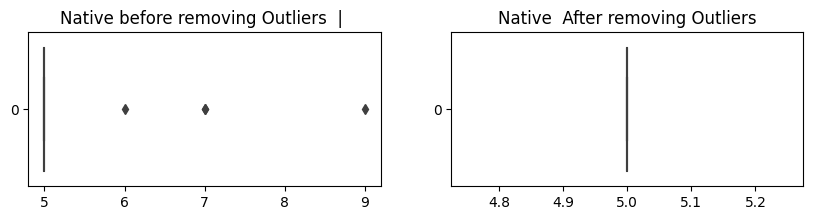

In [9]:
array = ['Magazines','tv_sponsorships', 'tv_cricket', 'tv_RON', 'radio', 'NPP', 'OOH', 'Social','Display_Rest', 'Search','Native']

for i,category in enumerate(array):
    plt.figure(figsize = (10,2))
    # Before removing Outliers
    plt.subplot(1,2,1)
    sns.boxplot(df[category],orient='h')
    plt.title(f"{category} before removing Outliers  | ")
    
    #After removing Ouliers   
    Q1,Q3 = df[category].quantile([0.25,0.75])
    iqr = Q3 - Q1
    MX = Q3 + 1.5*iqr

    plt.subplot(1,2,2)
    sns.boxplot(df[(df[category]<=MX)][category],orient='h')
    plt.title(f"{category}  After removing Outliers")
    ind = df[~(df[category]<=MX)].index
    df.drop(index=ind,inplace=True)
    plt.show()

 # <font color=red>4.Checking for Relation between different columns & Sales</font>

- **Checking for correlation between diffirent Parametes**

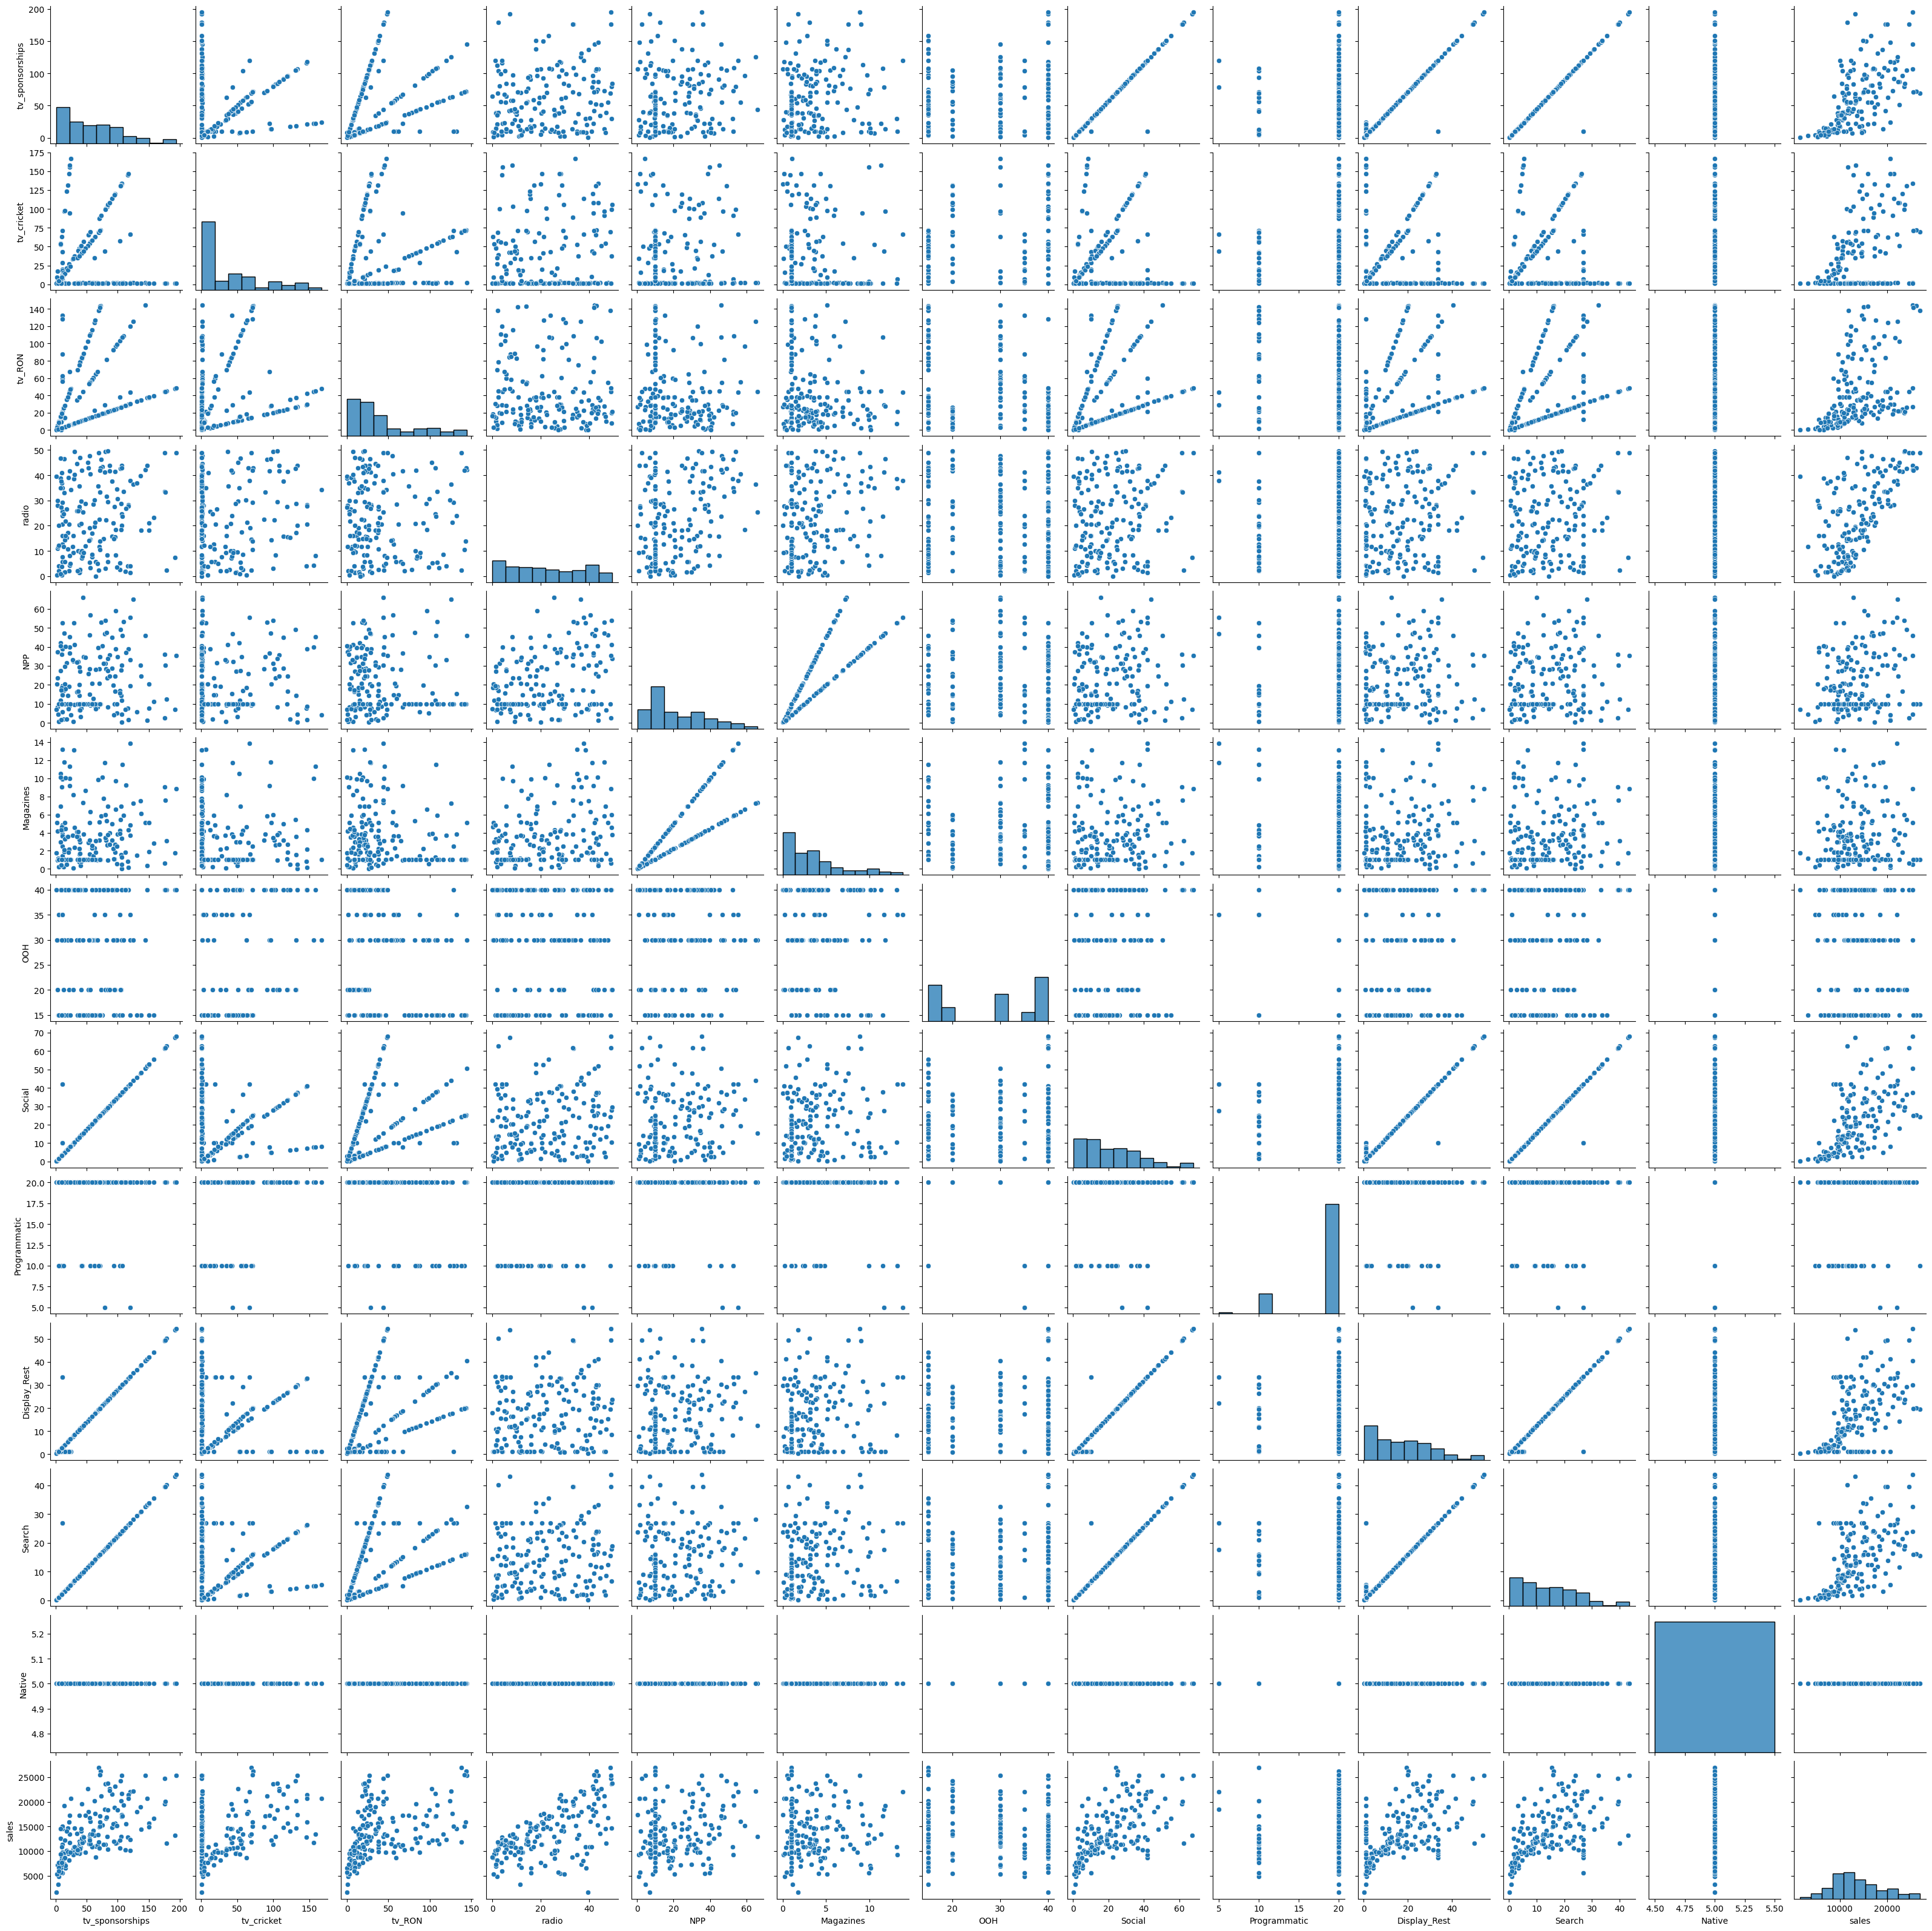

In [10]:
sns.pairplot(df)
plt.show()

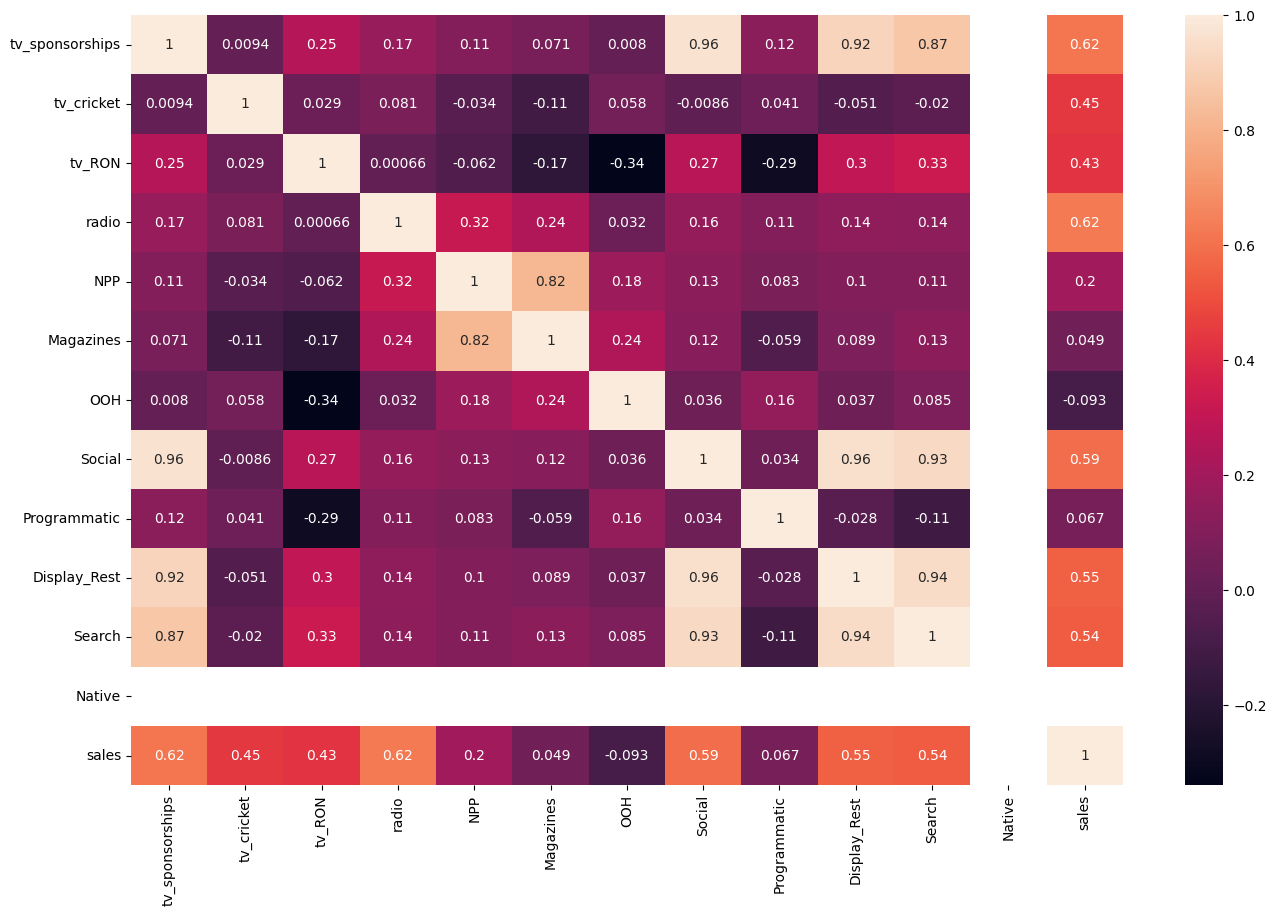

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

- **As we can see from heatmap & pair-plot that Native is weekly correlated so we can drop this column**
- **Social can also be dropped since its highly correlated to tv_sponsorship, display_rest and search**

In [12]:
df.drop(columns=['Native','Programmatic','Social'],inplace=True)
df.shape

(172, 11)

- Befor Dropping Outliers & Columns we can see the shape was (200,14)
- After dropping them the shap is (176, 11)

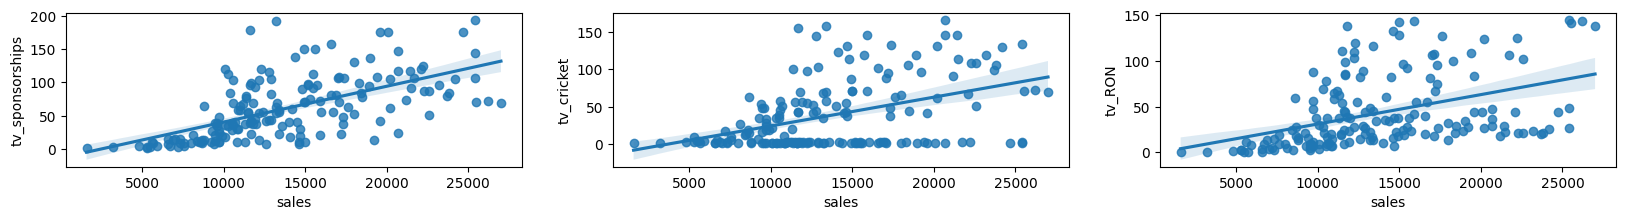

In [13]:
#Checking for trend line as this three are having high correlation & similar pattern
plt.figure(figsize=(20,2))
plt.subplot(1,3,1)
sns.regplot(data=df, y="tv_sponsorships", x="sales")

plt.subplot(1,3,2)
sns.regplot(data=df, y='tv_cricket', x="sales")

plt.subplot(1,3,3)
sns.regplot(data=df, y='tv_RON', x="sales")

plt.show()

# <font color=red>5.Feature Engineering</font>

- **We can see that tv_RON & tv_cricket are having same cor-relatoion with sales & same nature of scatterplot so we can either drop one of them or we can take avg of them and create new feature from them**

- **So we will be creating new feature from them by taking average of them after scaling & naming them as:**
- df["tv_Combine_RON_and_cricket"] = df['tv_RON'] + df["tv_cricket"]

In [14]:
df["tv_Combine_RON_and_cricket"] = (df['tv_RON'] + df["tv_cricket"])/2

# <font color=red>6. Model Preparation</font>

In [15]:
# Splitting a data into Test & Train 
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
mediamix_train, mediamix_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

**Rescaling the Features :**

So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.
As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
arrays = ['tv_sponsorships','tv_cricket','tv_RON',"tv_Combine_RON_and_cricket",'radio','NPP','Magazines','OOH','Display_Rest','Search','sales']

mediamix_train[arrays] = scaler.fit_transform(mediamix_train[arrays])

In [17]:
mediamix_train.head()

,Date,tv_sponsorships,tv_cricket,tv_RON,radio,NPP,Magazines,OOH,Display_Rest,Search,sales,tv_Combine_RON_and_cricket
116,2010-01-09,0.068194,0.623481,0.193602,0.288306,0.307190,0.368573,1.0,0.014812,0.068194,0.430894,0.578854
67,2006-01-08,0.283813,0.443819,0.096871,0.292339,0.135431,0.071687,0.2,0.283813,0.283813,0.479675,0.384630
174,2015-01-07,0.283194,0.352987,0.773296,0.068548,0.147895,0.070239,0.0,0.283194,0.283194,0.402439,0.772240
113,2010-01-06,0.104508,0.942074,0.291516,0.415323,0.126007,0.152788,1.0,0.014812,0.104508,0.581301,0.873964
154,2013-01-11,0.771381,0.000000,0.261196,0.425403,0.111415,0.135409,0.0,0.771381,0.771381,0.569106,0.174942


**Dividing into X & Y sets for Model Building**

In [18]:
y_train = mediamix_train['sales']
X_train = mediamix_train[['tv_sponsorships','tv_cricket','tv_RON',"tv_Combine_RON_and_cricket",'radio','NPP','Magazines','OOH','Display_Rest','Search']]

In [19]:
"""Since there are many independent variables,Recursive Feature Elimination, or RFE for short, 
is a feature selection algorithm to consider important n FEATURES.... on the basis of correlation in heatmap """
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
rfe = RFE(estimator=LinearRegression(),n_features_to_select=9)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('tv_sponsorships', True, 1),
 ('tv_cricket', True, 1),
 ('tv_RON', True, 1),
 ('tv_Combine_RON_and_cricket', True, 1),
 ('radio', True, 1),
 ('NPP', True, 1),
 ('Magazines', True, 1),
 ('OOH', False, 2),
 ('Display_Rest', True, 1),
 ('Search', True, 1)]

In [20]:

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()


,tv_sponsorships,tv_cricket,tv_RON,tv_Combine_RON_and_cricket,radio,NPP,Magazines,Display_Rest,Search
116,0.068194,0.623481,0.193602,0.578854,0.288306,0.307190,0.368573,0.014812,0.068194
67,0.283813,0.443819,0.096871,0.384630,0.292339,0.135431,0.071687,0.283813,0.283813
174,0.283194,0.352987,0.773296,0.772240,0.068548,0.147895,0.070239,0.283194,0.283194
113,0.104508,0.942074,0.291516,0.873964,0.415323,0.126007,0.152788,0.014812,0.104508
154,0.771381,0.000000,0.261196,0.174942,0.425403,0.111415,0.135409,0.771381,0.771381


# <font color=red>7.Model Development</font>

In [21]:
#Creating functions for model building, reading summary and VIF, since these actions will have to be done 
#Variance Inflation Factor (VIF) to determine multicollinearity and drop features based on high VIF values
lm = LinearRegression()
def Model_building(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    return X
    
def checking_of_VIF(X):
    VIF = pd.DataFrame()
    VIF['Features'] = X.columns
    VIF['VIF Values'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return VIF.sort_values(by = 'VIF Values')

- **MODEL NO 1**

In [22]:
X_trained_2 = Model_building(X_train_rfe,y_train)
checking_of_VIF(X_trained_2)

,Features,VIF Values
5,radio,1.212300
6,NPP,3.366267
7,Magazines,3.574551
1,tv_sponsorships,6.185516
0,const,6.768251
9,Search,21.567338
8,Display_Rest,24.577588
2,tv_cricket,inf
3,tv_RON,inf
4,tv_Combine_RON_and_cricket,inf


In [23]:
# We will be dropping Display_Rest as it is having high VIF value
X_trained_2 = X_trained_2.drop(columns='tv_cricket')
X_trained_2 = X_trained_2.drop(columns='tv_RON')

- **MODEL NO 02**

In [24]:
X_trained_3 = Model_building(X_trained_2,y_train)
checking_of_VIF(X_trained_3)

,Features,VIF Values
2,tv_Combine_RON_and_cricket,1.141489
3,radio,1.209729
4,NPP,3.311612
5,Magazines,3.483028
1,tv_sponsorships,6.051578
0,const,6.760075
7,Search,21.565851
6,Display_Rest,24.147392


In [25]:
# We will be dropping Search as it is having high VIF value
X_trained_3 = X_trained_3.drop(columns='Display_Rest')

- **MODEL NO 03**

In [26]:
X_trained_4 = Model_building(X_trained_3,y_train)
checking_of_VIF(X_trained_4)

,Features,VIF Values
2,tv_Combine_RON_and_cricket,1.127007
3,radio,1.204106
4,NPP,3.292547
5,Magazines,3.364677
1,tv_sponsorships,5.238317
6,Search,5.354701
0,const,6.758525


In [27]:
# We will be dropping NPP as it is having high VIF value
X_trained_4 = X_trained_4.drop(columns='Search')

- **MODEL NO 04**

In [28]:
X_trained_5 = Model_building(X_trained_4,y_train)
checking_of_VIF(X_trained_5)

,Features,VIF Values
1,tv_sponsorships,1.049572
2,tv_Combine_RON_and_cricket,1.112472
3,radio,1.200838
5,Magazines,3.127358
4,NPP,3.227253
0,const,6.688082


In [29]:
X_trained_5 = X_trained_5.drop(columns='NPP')

- **MODEL NO 05**

In [30]:
X_trained_6 = Model_building(X_trained_5,y_train)
checking_of_VIF(X_trained_6)

,Features,VIF Values
1,tv_sponsorships,1.048210
2,tv_Combine_RON_and_cricket,1.088810
3,radio,1.126936
4,Magazines,1.158914
0,const,6.637416


In [31]:
X_trained_6 = X_trained_6.drop(columns='Magazines')

- **Final MODEL**

In [32]:
X_train_final = Model_building(X_trained_6,y_train)
checking_of_VIF(X_train_final)

,Features,VIF Values
3,radio,1.020586
2,tv_Combine_RON_and_cricket,1.030291
1,tv_sponsorships,1.043349
0,const,5.612987


In [33]:
mm_model = sm.OLS(y_train,X_train_final).fit()
y_train_predict = mm_model.predict(X_train_final)

Text(0.5, 0, 'Errors')

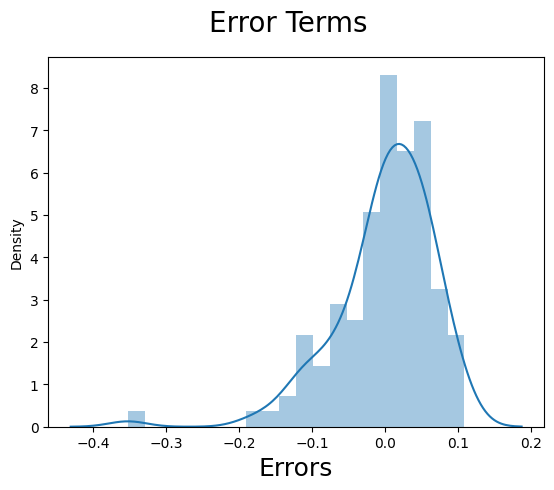

In [34]:
#Plotting Error Terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)           
plt.xlabel('Errors', fontsize = 18) 

# <font color=red>8. Model Testing</font>

In [35]:
# #Ensuring the features are within the same range/ scale for test data 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# num_features = ['tv_sponsorships','tv_cricket', 'tv_ron','tv_Combine_RON_and_cricket', 'radio', 'npp', 'magazines', 'ooh', 'social', 'display_rest', 'search', 'sales']
# mmx_test[num_features] = scaler.fit_transform(mmx_test[num_features])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
arrays = ['tv_sponsorships','tv_cricket','tv_RON',"tv_Combine_RON_and_cricket",'radio','NPP','Magazines','OOH','Display_Rest','Search','sales']

mediamix_train[arrays] = scaler.fit_transform(mediamix_train[arrays])

In [36]:
# Split the train dataset into X and y
x_test = mediamix_train[['tv_sponsorships',"tv_Combine_RON_and_cricket",'radio']]
y_test = mediamix_train['sales']

In [37]:
x_test = sm.add_constant(x_test)
sales_forecast = mm_model.predict(x_test)

Text(0, 0.5, 'Predicted Y')

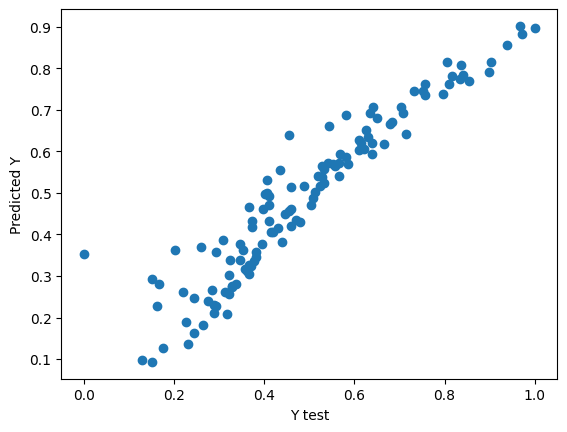

In [38]:
#Comparing actual and predicted sales for testing dataset
plt.scatter(y_test,sales_forecast)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [39]:
from sklearn import metrics
print ('MAE :', metrics.mean_absolute_error(y_test, sales_forecast))
print ('MSE :', metrics.mean_squared_error(y_test, sales_forecast))
print ('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, sales_forecast)))

MAE : 0.049600076460382364
MSE : 0.0045867793188067475
RMSE : 0.06772576554611065


- **Area of Improvements in Model could be**
- **Including the following data at month level**
- - Effect of Weather
- - Competitor effect